<a href="https://colab.research.google.com/github/yaya1721/ML-spring22/blob/main/ML_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment 4
Dania Herzalla dh2741 <br>
Long Phan lvp243 <br>
Sonya Hsieh yh3529 <br>

## Problem 1
refer to https://www.jeremyjordan.me/decision-trees/

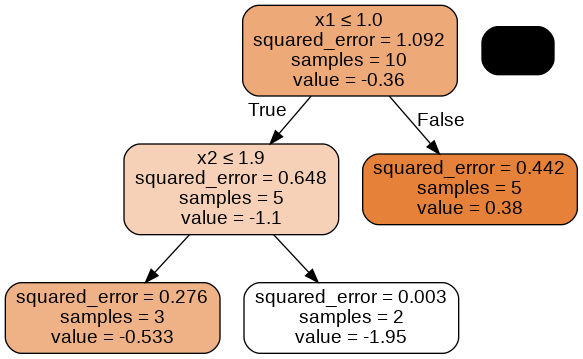

In [ ]:
from sklearn import datasets
# Load the diabetes dataset
# diabetes = datasets.load_diabetes()

import pandas as pd 

data = {
  "x1": [1.3, 2.1, 0.1, 0.9, 0.5, 0.3, 0.5, 1.1, 1.1, 1.7],
  "x2": [1.5, 2.3, 0.9, 2.9, 0.3, 2.3, 1.5, 1.9, 0.7, 0.7],
  "y" : [0.0, 0.5, -0.8, -1.9, 0.2, -2.0, -1.0, -0.6, 0.6, 1.4]
}
features = pd.DataFrame(data, columns = ["x1", "x2"])
target = pd.DataFrame(data, columns = ["y"])
#print(features)
#print(target)

# build the regression tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_leaf_nodes = 3)
regressor.fit(features, target)

from IPython.display import Image  
from six import StringIO  
import pydot  
from sklearn import tree

# produce the graph
dot_data = StringIO()  
tree.export_graphviz(regressor, out_file=dot_data,  
    feature_names=features.columns,
    class_names=target.columns,
    filled=True, rounded=True,
    special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

### Part 1
predicted output for the input (1.4, 1.9): according to the graph above, the output should be 0.38

### Part 2
split the data points in node D into two using either x1 or x2 as the splitting feature

In [ ]:
# sorting data based on x1 for a clearer picture
df = pd.DataFrame(data)
print(df.sort_values('x1'))

    x1   x2    y
2  0.1  0.9 -0.8
5  0.3  2.3 -2.0
4  0.5  0.3  0.2
6  0.5  1.5 -1.0
3  0.9  2.9 -1.9
7  1.1  1.9 -0.6
8  1.1  0.7  0.6
0  1.3  1.5  0.0
9  1.7  0.7  1.4
1  2.1  2.3  0.5


In node D, there will be data points (1.1, 1.9, -0.6), (1.1, 0.7, 0.6), (1.3, 1.5, 0.0), (1.7, 0.7, 1.4), (2.1, 2.3, 0.5) and we take these data to run Regression Tree again.

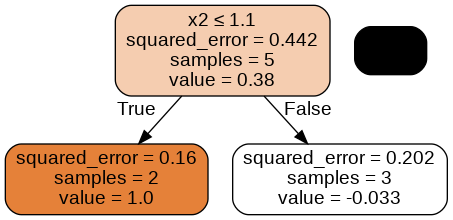

In [ ]:
data2 = {
  "x1": [1.1, 1.1, 1.3, 1.7, 2.1],
  "x2": [1.9, 0.7, 1.5, 0.7, 2.3],
  "y" : [-0.6, 0.6, 0.0, 1.4, 0.5]
}

features = pd.DataFrame(data2, columns = ["x1", "x2"])
target = pd.DataFrame(data2, columns = ["y"])

# build the regression tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_leaf_nodes = 2)
regressor.fit(features, target)

from IPython.display import Image  
from six import StringIO  
import pydot  
from sklearn import tree

# produce the graph
dot_data = StringIO()  
tree.export_graphviz(regressor, out_file=dot_data,  
    feature_names=features.columns,
    class_names=target.columns,
    filled=True, rounded=True,
    special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

According to the graph above, we will use x2 with the splitting feature x2 <= 1.1

## Problem 2
Finished

## Problem 3
Finished

## Problem 4

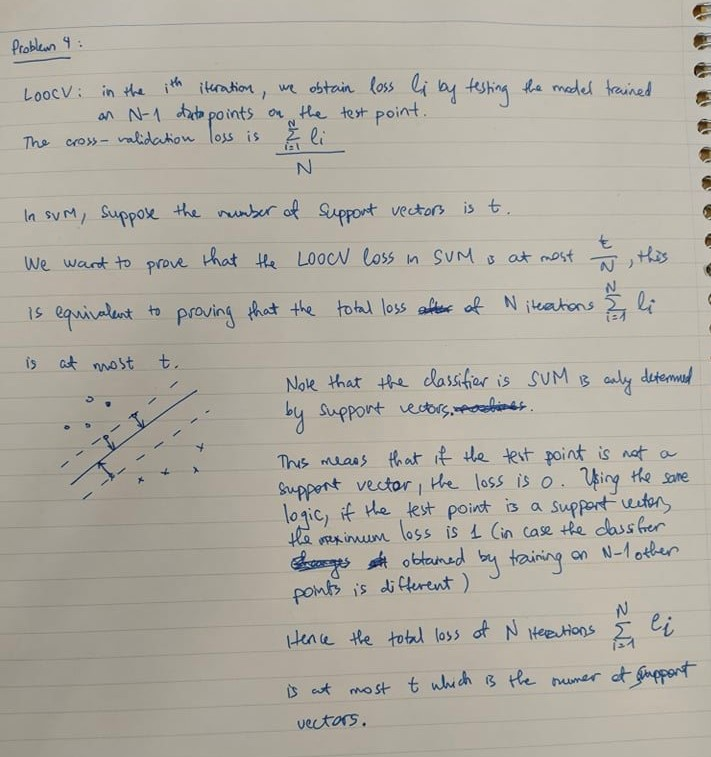

## Problem 5

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data1.txt to data1.txt
Saving data2.txt to data2.txt
Saving data3.txt to data3.txt
Saving data4.txt to data4.txt


refer to https://www.kaggle.com/code/satishgunjal/tutorial-k-means-clustering/notebook

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# data cleaning
df1 = pd.read_csv('data1.txt', names = ['X'], header = None)
df2 = pd.read_csv('data2.txt', names = ['X'], header = None)
df3 = pd.read_csv('data3.txt', names = ['X'], header = None)
df4 = pd.read_csv('data4.txt', names = ['X'], header = None)

df1[['x','y']] = df1.X.str.split(expand=True)
df1.drop(['X'], axis=1, inplace=True)
df2[['x','y']] = df2.X.str.split(expand=True)
df2.drop(['X'], axis=1, inplace=True)
df3[['x','y']] = df3.X.str.split(expand=True)
df3.drop(['X'], axis=1, inplace=True)
df4[['x','y']] = df4.X.str.split(expand=True)
df4.drop(['X'], axis=1, inplace=True)
print("Shape of the data= ", df1.shape)
df1.head()

Shape of the data=  (1000, 2)


,x,y
0,0.3666317,0.12362048
1,0.38140836,0.07214094
2,0.48318852,0
3,0.41155269,0.06613099
4,0.37768721,0.1228149


### Elbow Method 
Using the elbow method to find the optimal number of clusters.

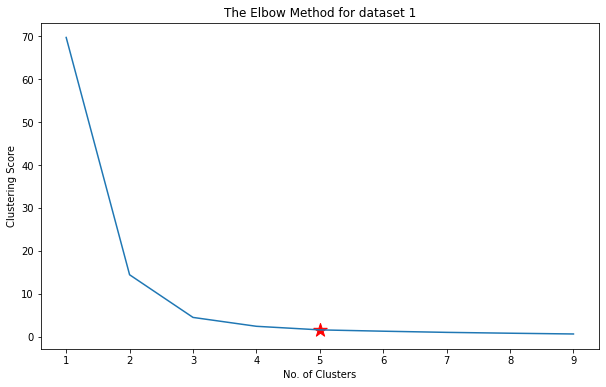

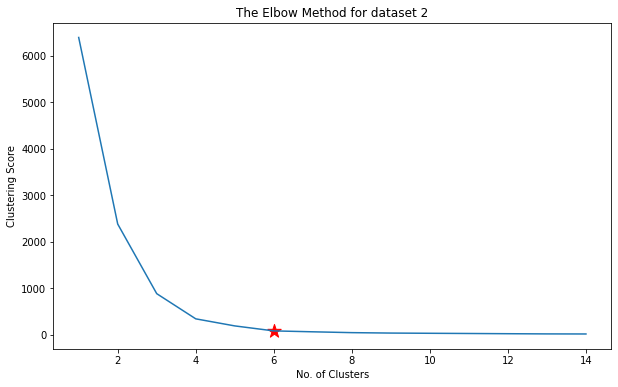

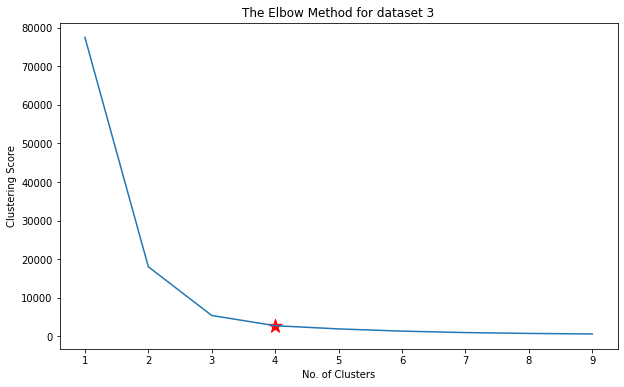

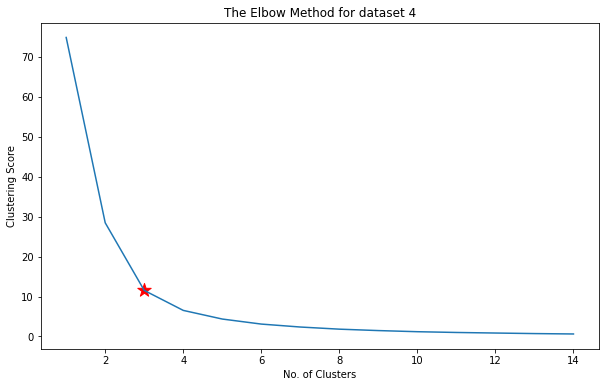

In [ ]:
# 1
X = df1.iloc[:, [0]].values
clustering_score = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 0)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.

plt.figure(figsize=(10,6))
plt.plot(range(1, 10), clustering_score)
plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method for dataset 1')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

# 2
X = df2.iloc[:, [0]].values
clustering_score = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 0)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.

plt.figure(figsize=(10,6))
plt.plot(range(1, 15), clustering_score)
plt.scatter(6,clustering_score[5], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method for dataset 2')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

# 3
X = df3.iloc[:, [0]].values
clustering_score = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 0)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.

plt.figure(figsize=(10,6))
plt.plot(range(1, 10), clustering_score)
plt.scatter(4,clustering_score[3], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method for dataset 3')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

# 4
X = df4.iloc[:, [0]].values
clustering_score = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 0)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.

plt.figure(figsize=(10,6))
plt.plot(range(1, 15), clustering_score)
plt.scatter(3,clustering_score[2], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method for dataset 4')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

**guess the number of clusters in each of datasets** <br>
(shown as the above red stars) <br>
dataset1: 5<br>
dataset2: 6<br>
dataset3: 4<br>
dataset4: 3<br>

Plot the dataset

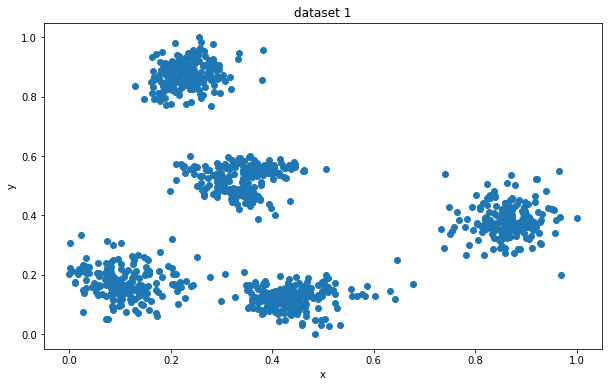

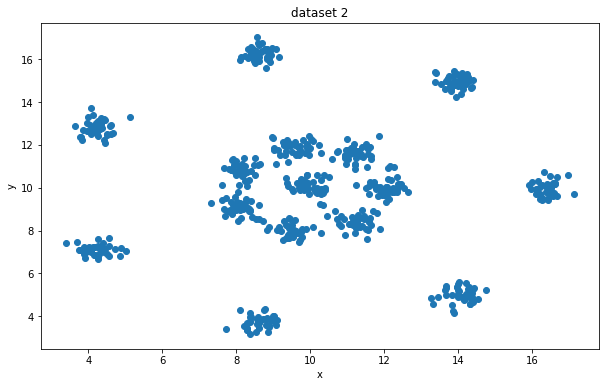

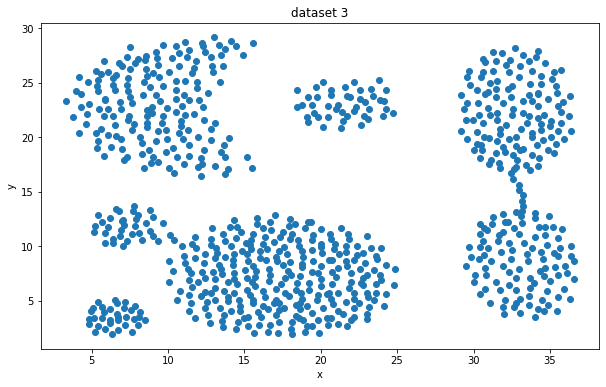

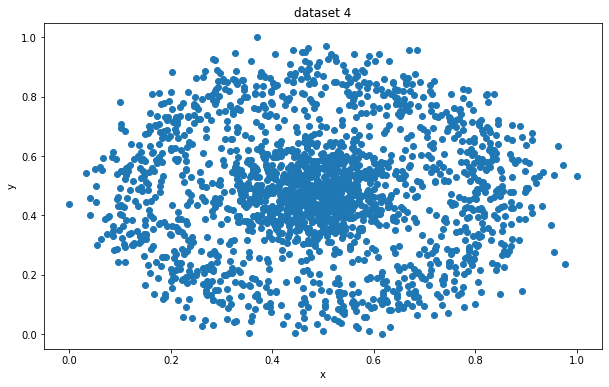

In [ ]:
# 1 
plt.figure(figsize=(10,6))
df1['x'] = df1['x'].astype('float')
df1['y'] = df1['y'].astype('float')
plt.scatter(df1['x'],df1['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('dataset 1')
plt.show()

# 2
plt.figure(figsize=(10,6))
df2['x'] = df2['x'].astype('float')
df2['y'] = df2['y'].astype('float')
plt.scatter(df2['x'],df2['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('dataset 2')
plt.show()

# 3 
plt.figure(figsize=(10,6))
df3['x'] = df3['x'].astype('float')
df3['y'] = df3['y'].astype('float')
plt.scatter(df3['x'],df3['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('dataset 3')
plt.show()

# 4 
plt.figure(figsize=(10,6))
df4['x'] = df4['x'].astype('float')
df4['y'] = df4['y'].astype('float')
plt.scatter(df4['x'],df4['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('dataset 4')
plt.show()

**the actual number of clusters in each of datasets** <br>
dataset1: 5<br>
dataset2: 7<br>
dataset3: 7<br>
dataset4: 2<br>
According to lecture 18, when clusters are not spherical or clusters have uneven sizes then K-mean clustering method is not appropriate.

## Problem 6

select a few (at most 50) of the images for which we obtain the
labelsand  use these to label the others (minibatch)

refer to 
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html    
https://www.reneshbedre.com/blog/kmeans-clustering-python.html

In [ ]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

dataset, label = load_digits(n_class = 30, return_X_y=True)
#df = pd.DataFrame(dataset)

(n_samples, n_features), n_digits = dataset.shape, np.unique(label).size
print(f"{n_digits} digits; {n_samples} samples; {n_features} features")


10 digits; 1797 samples; 64 features


Plotting the graph of original data distribution

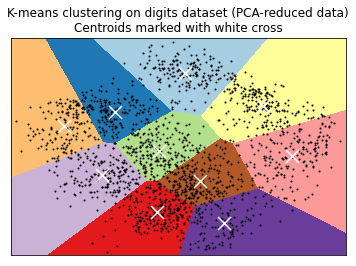

In [ ]:
# pca project the data from the original 64-dimensional space into a lower dimensional space
reduced_data = PCA(n_components=2).fit_transform(dataset)
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=0).fit(reduced_data)

#Plotting decision boundaries
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
#"Step size of the mesh. Decrease to increase the quality of the VQ."
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#Labels for each point
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

#PCA reduced plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on digits dataset (PCA-reduced data)\n"
    "Centroids marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**Minibatch K-mean** <br>
Apply label to the rest of the dataset and test the accuracy

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs

mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 10, batch_size = 50, max_no_improvement = 10, verbose = 0).fit(dataset)
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0)
mbk_means_labels = pairwise_distances_argmin(dataset, mbk_means_cluster_centers)
  
# print the set of labels predicted for a sample must exactly match the corresponding set of true labels
print(accuracy_score(label, mbk_means_labels))


0.047857540345019475


## Problem 7


### Part 1

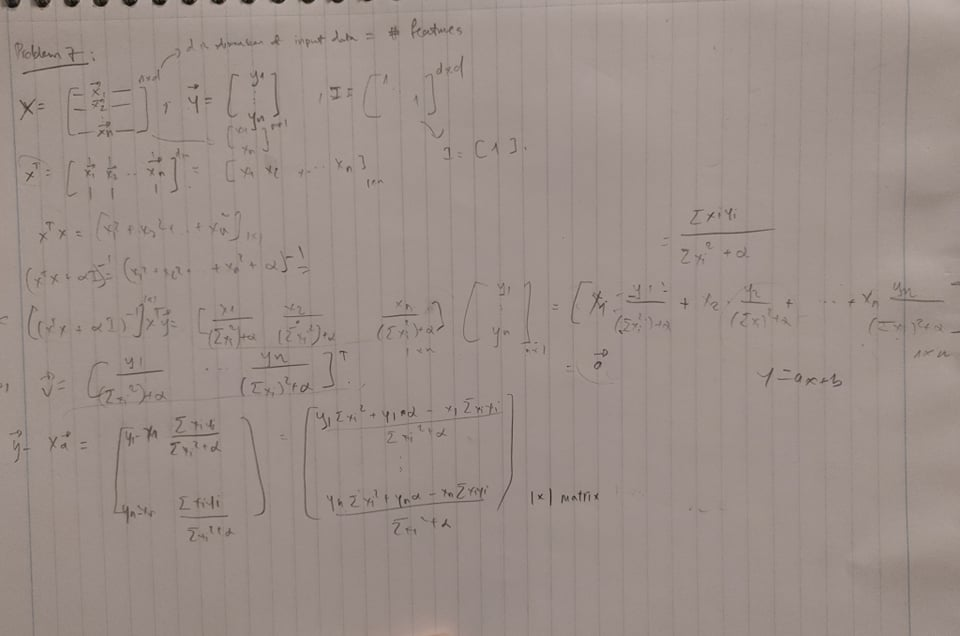

### Part 2

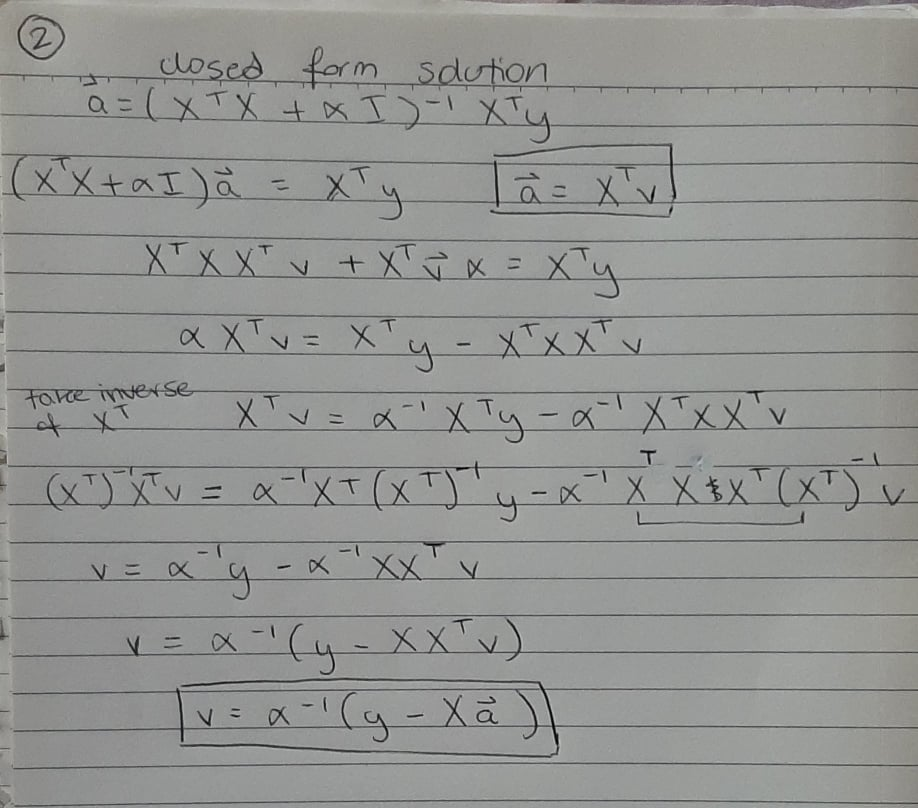

### Part 3

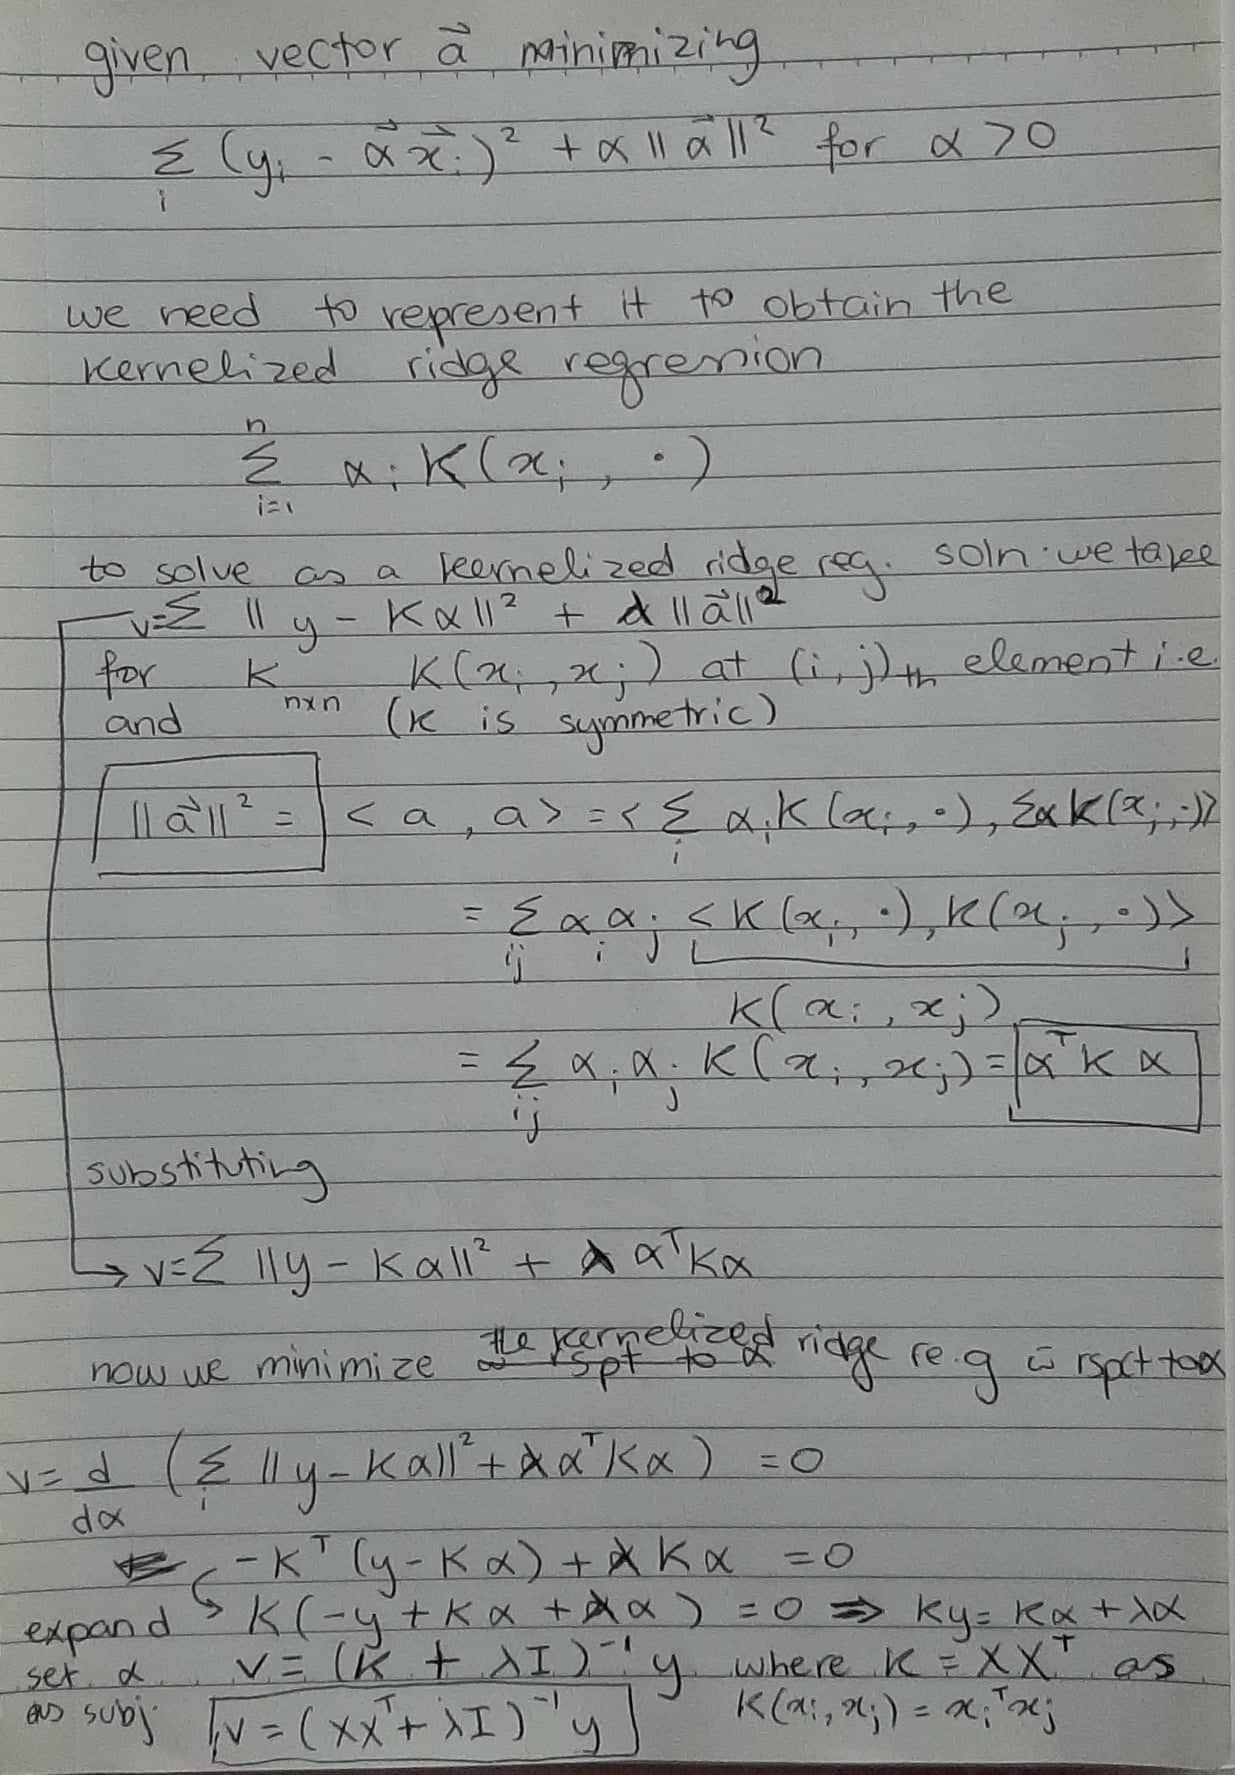

### Part 4

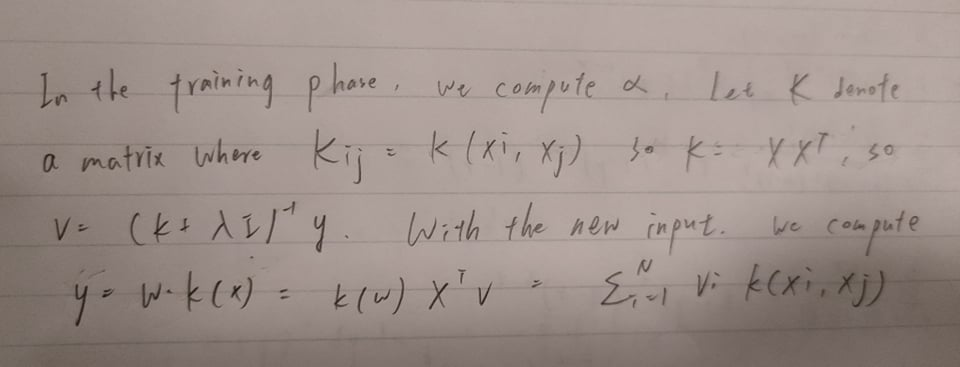

### Part 5

Similarities between the formulation of Ridge Regression and soft-margin Support Vector Machines
- They can be both Kernelized since the objective function to optimize both contains pairs of dot product (xi,xj)
- Regarding the objective function that involves Eucledian distance of these two algorithms, we need to optimize it under some constraint